In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip3 install apyori

In [3]:
data=pd.read_csv("Market_Basket - Market_Basket.csv",header=None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(7501, 20)

In [6]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object

In [7]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [8]:
data[0].value_counts()

0
mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
shampoo                1
ketchup                1
cream                  1
body spray             1
oatmeal                1
Name: count, Length: 115, dtype: int64

In [9]:
data.values.tolist()

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [10]:
transactions = []
for i in range(len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0,20) if str(data.values[i,j])!="nan"])
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [11]:
from apyori import apriori

In [12]:
rules = apriori(transactions,min_support=0.003,min_confidence=0.01,min_lift=3,min_length=2)
values = list(rules)
values

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [13]:
values[0]

RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)])

In [14]:
list=[]

In [15]:
for item in values:
    pair=item[0]
    items=[x for x in pair]
    list.append([str(items[0] + "-" + items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
list


[['brownies-cottage cheese',
  '0.0034662045060658577',
  '0.10276679841897232',
  '3.225329518580382'],
 ['light cream-chicken',
  '0.004532728969470737',
  '0.07555555555555556',
  '4.843950617283951'],
 ['escalope-mushroom cream sauce',
  '0.005732568990801226',
  '0.0722689075630252',
  '3.7908326967150496'],
 ['escalope-pasta',
  '0.005865884548726837',
  '0.07394957983193277',
  '4.700811850163794'],
 ['fresh bread-tomato juice',
  '0.004266097853619517',
  '0.09907120743034055',
  '3.2593558198902826'],
 ['fresh tuna-honey',
  '0.003999466737768298',
  '0.17964071856287428',
  '3.7850703088205613'],
 ['honey-fromage blanc',
  '0.003332888948140248',
  '0.2450980392156863',
  '5.164270764485569'],
 ['ground beef-herb & pepper',
  '0.015997866951073192',
  '0.1628222523744912',
  '3.291993841134928'],
 ['tomato sauce-ground beef',
  '0.005332622317024397',
  '0.054274084124830396',
  '3.840659481324083'],
 ['olive oil-light cream',
  '0.003199573390214638',
  '0.20512820512820515'

In [16]:
table = pd.DataFrame(list,columns=['Rule','Support','Confidence','Lift'])

In [17]:
table

,Rule,Support,Confidence,Lift
0,brownies-cottage cheese,0.0034662045060658577,0.10276679841897232,3.225329518580382
1,light cream-chicken,0.004532728969470737,0.07555555555555556,4.843950617283951
2,escalope-mushroom cream sauce,0.005732568990801226,0.0722689075630252,3.7908326967150496
3,escalope-pasta,0.005865884548726837,0.07394957983193277,4.700811850163794
4,fresh bread-tomato juice,0.004266097853619517,0.09907120743034055,3.2593558198902826
...,...,...,...,...
89,mineral water-ground beef,0.0030662578322890282,0.21100917431192662,3.532990661861075
90,tomatoes-mineral water,0.0030662578322890282,0.03120759837177748,3.344117076952898
91,milk-spaghetti,0.003332888948140248,0.05060728744939272,3.216993755575379
92,milk-shrimp,0.0030662578322890282,0.0638888888888889,3.014028651292803


In [18]:
table.sort_values(by=['Support'],ascending=False)

,Rule,Support,Confidence,Lift
7,ground beef-herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
30,frozen vegetables-spaghetti,0.008665511265164644,0.08819538670284939,3.165328208890303
51,milk-soup,0.008532195707239034,0.16886543535620052,3.518498973907945
10,whole wheat pasta-olive oil,0.007998933475536596,0.12145748987854252,4.1224100976422955
34,frozen vegetables-shrimp,0.007199040127982935,0.07552447552447553,3.2006163328197226
...,...,...,...,...
41,green tea-ground beef,0.0030662578322890282,0.04483430799220273,3.0297490472929067
49,tomato sauce-spaghetti,0.0030662578322890282,0.03120759837177748,4.980599901844742
55,milk-soup,0.0030662578322890282,0.02366255144032922,3.4133230452674903
62,whole wheat rice-tomatoes,0.0030662578322890282,0.04483430799220273,3.1726617382029496


In [19]:
pd.DataFrame(values)

,items,support,ordered_statistics
0,"(brownies, cottage cheese)",0.003466,"[((brownies), (cottage cheese), 0.102766798418..."
1,"(light cream, chicken)",0.004533,"[((chicken), (light cream), 0.0755555555555555..."
2,"(escalope, mushroom cream sauce)",0.005733,"[((escalope), (mushroom cream sauce), 0.072268..."
3,"(escalope, pasta)",0.005866,"[((escalope), (pasta), 0.07394957983193277, 4...."
4,"(fresh bread, tomato juice)",0.004266,"[((fresh bread), (tomato juice), 0.09907120743..."
...,...,...,...
89,"(mineral water, ground beef, pancakes, spaghetti)",0.003066,"[((pancakes, ground beef), (spaghetti, mineral..."
90,"(tomatoes, mineral water, ground beef, spaghetti)",0.003066,"[((ground beef), (mineral water, tomatoes, spa..."
91,"(milk, spaghetti, mineral water, olive oil)",0.003333,"[((olive oil), (milk, mineral water, spaghetti..."
92,"(milk, shrimp, mineral water, spaghetti)",0.003066,"[((milk, mineral water), (spaghetti, shrimp), ..."


In [23]:
d=pd.DataFrame(values).sort_values(by=['support'],ascending=False)
d

,items,support,ordered_statistics
7,"(ground beef, herb & pepper)",0.015998,"[((ground beef), (herb & pepper), 0.1628222523..."
30,"(frozen vegetables, spaghetti, ground beef)",0.008666,"[((ground beef), (frozen vegetables, spaghetti..."
51,"(milk, soup, mineral water)",0.008532,"[((soup), (milk, mineral water), 0.16886543535..."
10,"(whole wheat pasta, olive oil)",0.007999,"[((olive oil), (whole wheat pasta), 0.12145748..."
34,"(frozen vegetables, shrimp, mineral water)",0.007199,"[((frozen vegetables), (mineral water, shrimp)..."
...,...,...,...
86,"(frozen vegetables, spaghetti, mineral water, ...",0.003066,"[((frozen vegetables), (mineral water, spaghet..."
89,"(mineral water, ground beef, pancakes, spaghetti)",0.003066,"[((pancakes, ground beef), (spaghetti, mineral..."
88,"(mineral water, ground beef, olive oil, spaghe...",0.003066,"[((ground beef), (spaghetti, mineral water, ol..."
90,"(tomatoes, mineral water, ground beef, spaghetti)",0.003066,"[((ground beef), (mineral water, tomatoes, spa..."


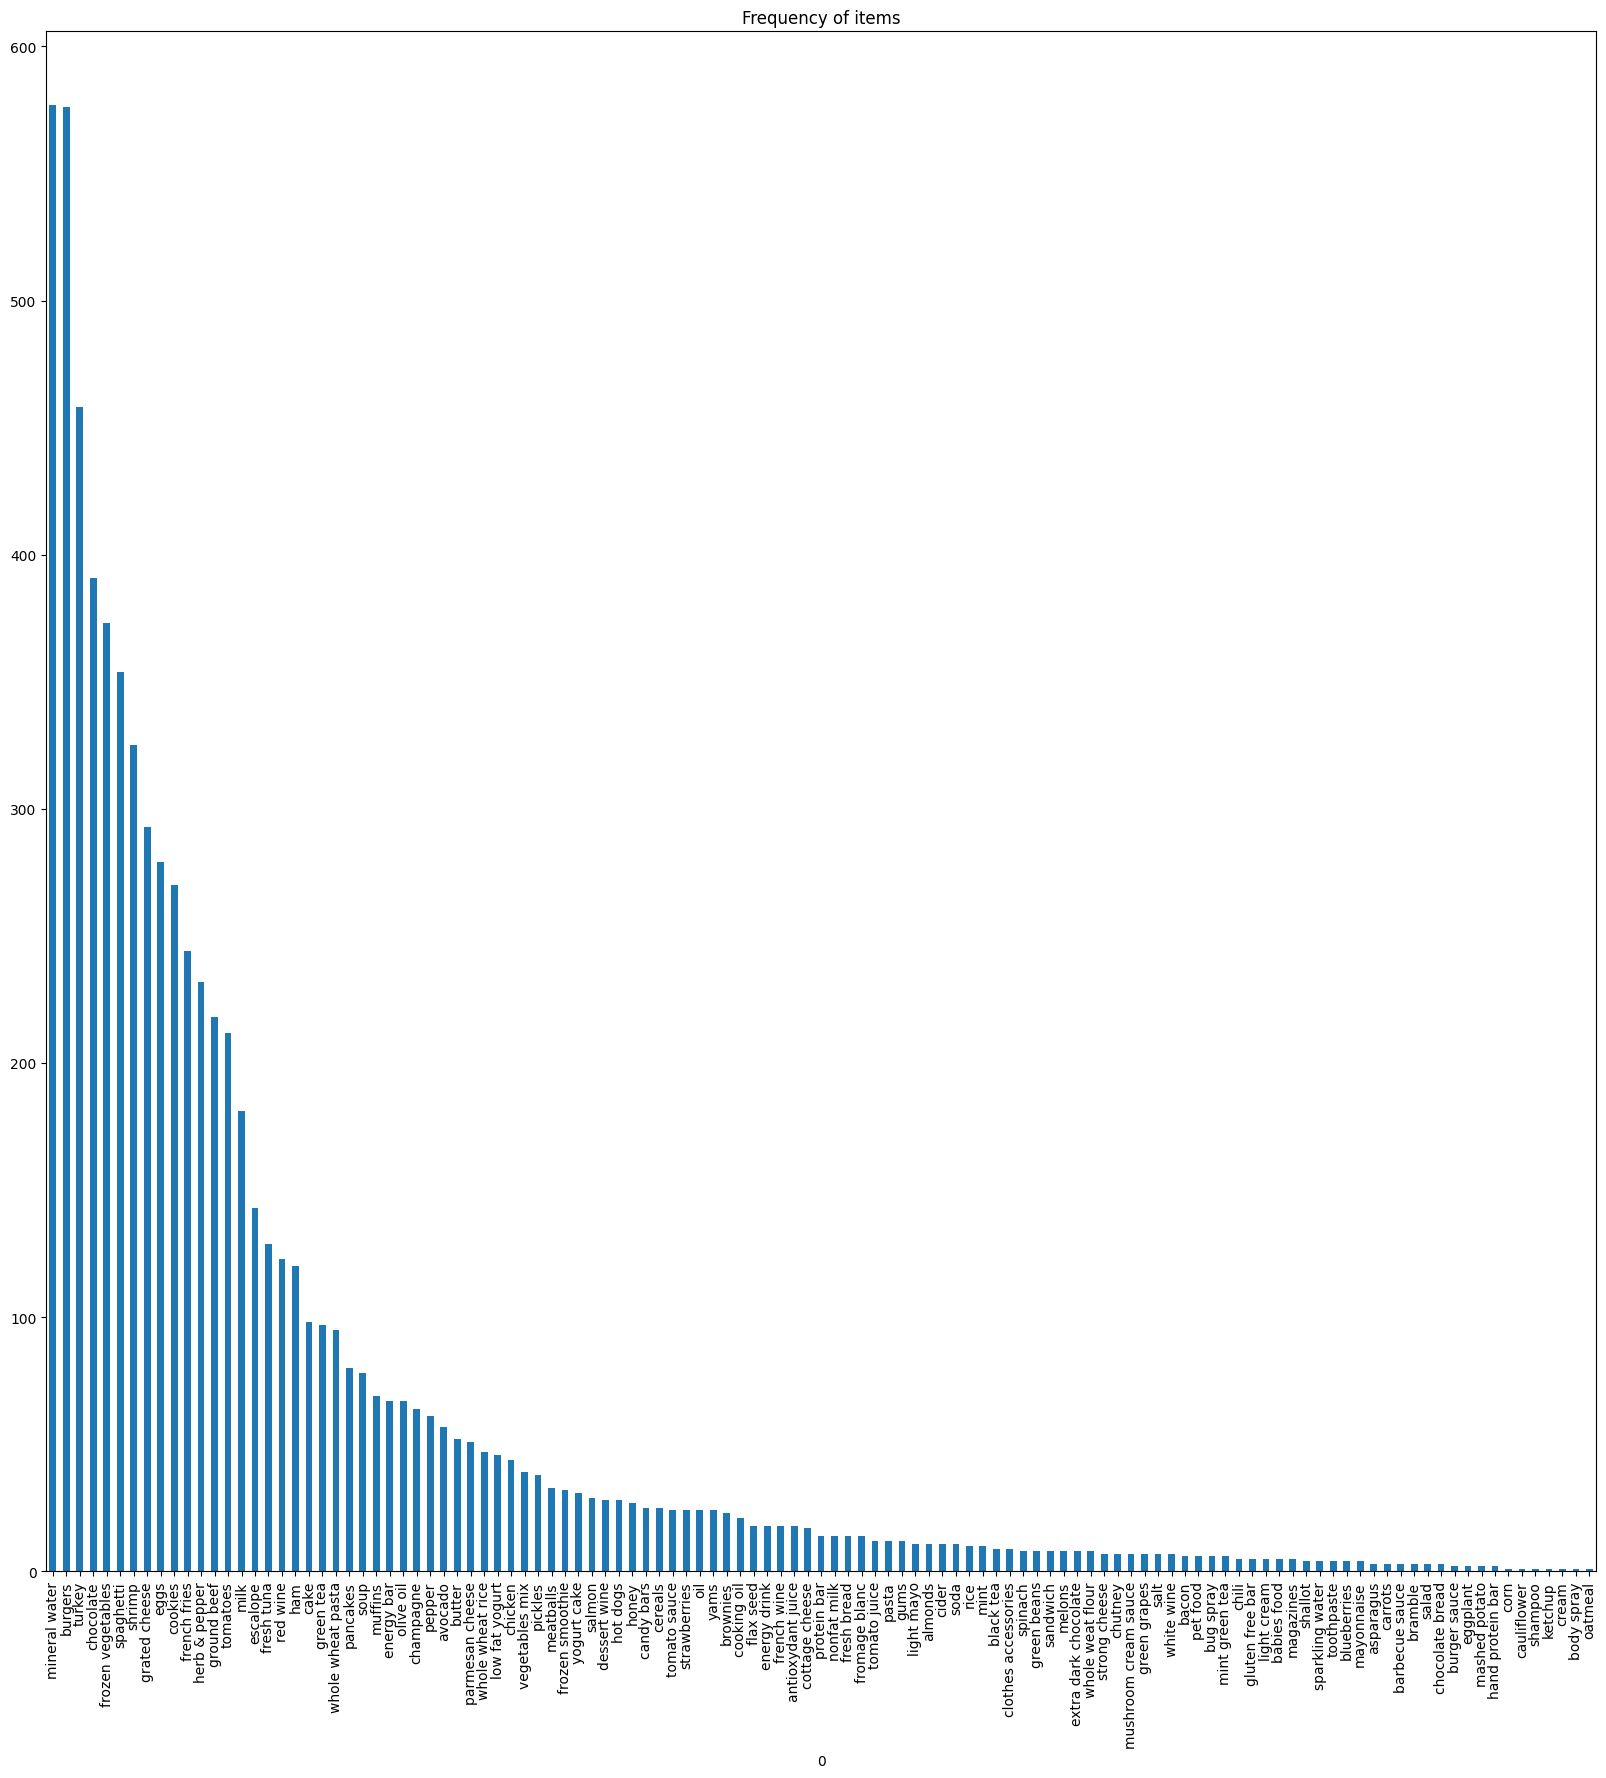

In [21]:
data[0].value_counts().plot.bar(figsize=(20,20))
plt.title("Frequency of items")
plt.show()

In [24]:
h=d.head(10)

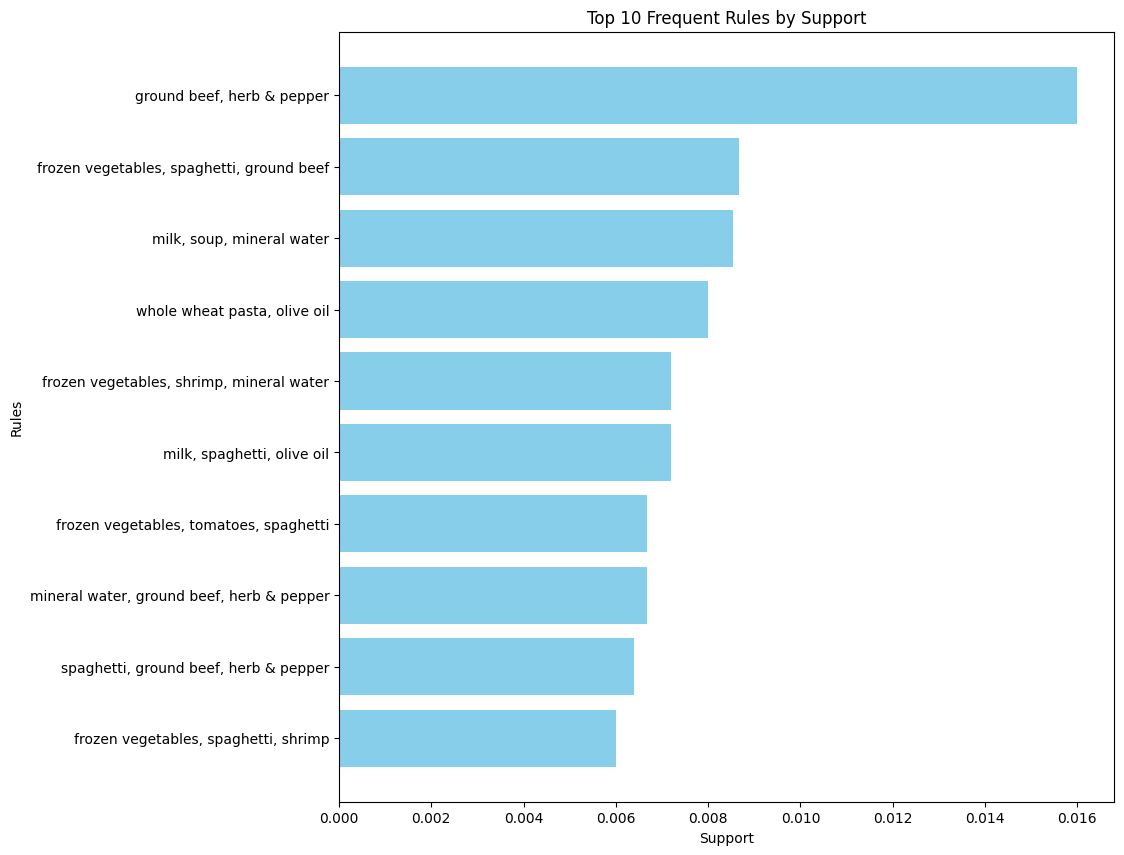

In [44]:
plt.figure(figsize=(10, 10))
plt.barh([', '.join(values) for values in h['items']], h['support'], color='skyblue')  
plt.xlabel('Support')
plt.ylabel('Rules')
plt.title('Top 10 Frequent Rules by Support')
plt.gca().invert_yaxis()  
plt.show()


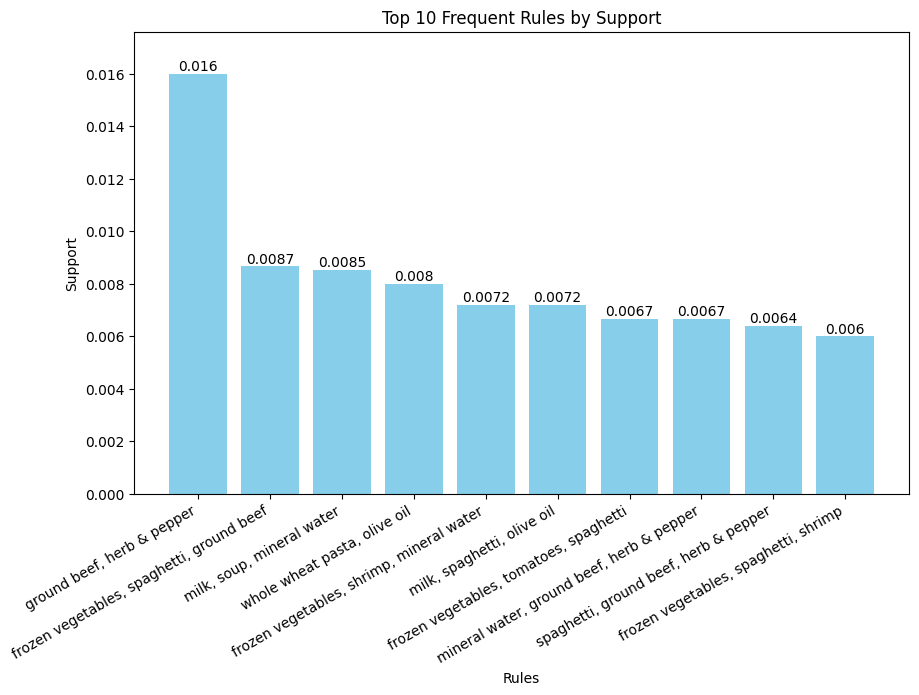

In [46]:
plt.figure(figsize=(10, 6))
bars = plt.bar([', '.join(values) for values in h['items']], h['support'], color='skyblue')
plt.xlabel('Rules')
plt.ylabel('Support')
plt.title('Top 10 Frequent Rules by Support')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')
plt.xticks(rotation=30, ha='right')  
plt.ylim(0, max(h['support']) * 1.1) 
plt.show()
